In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
import random
import os
import pickle
import re
from os import listdir
from os.path import isfile, join
import seaborn as sns
from sklearn.decomposition import PCA
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv1D, Dropout,AveragePooling1D,BatchNormalization,GlobalAveragePooling1D
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import keras
from keras.regularizers import l2
import time
import sqlite3

Using TensorFlow backend.


# Obtenção dos caminhos dos resultados das simulações geradas.

In [2]:
def define_rotulos(output,label_to_predict):
    labels = []
    for i in range(len(output[label_to_predict])):
        lista = [output[label_to_predict][i]]*300
        labels.append(lista)
    flat_list = []
    for sublist in labels:
        for item in sublist:
            flat_list.append(item)

    labels_final = np.array(flat_list)
    return labels_final

In [3]:
def get_data_from_map(path):
    f = open(path, 'r')
    lines = f.readlines()
    f.close()         
    total_values_angles = [line.split('\t')[1:] for line in lines]
    k = 0
    for array in total_values_angles:
        new_array = []
        for i in range(len(array)):
            if array[i] != '\n':
                new_array.append(float(array[i]))
        total_values_angles[k] = new_array
        k+=1
    
    
    specs = {}
    lab = 'a'
    n = 0
    data_training = []
    for i in range(301):
        specs[lab + str(i)] = []
        for j in range(len(total_values_angles)):
            specs[lab + str(i)].append(total_values_angles[j][n])
        n+=1
        data_training.append(specs[lab+str(i)])
    data_training = np.array(data_training)
    return data_training[1:]

In [4]:
def get_energies():
    f = open(paths[0], 'r')
    lines = f.readlines()
    f.close()
    energies = []
    all_data = [line.split('\t') for line in lines]
    for line in all_data:
        if line[0] != '\n':
            energies.append(float(line[0]))
    
    return energies

In [5]:
def prepare_data_to_df(paths):
    n_array = 689
    df = pd.DataFrame(columns = np.arange(0,n_array))
    start_time = time.time()
    k = 0
    j = 0
    for path in zip(paths):
        data = get_data_from_map(path[0])
        data = data[1:]
        df1 = pd.DataFrame(data)
        df = df.append(df1, ignore_index = True)
        k+=1
        print("Restam {} mapas!".format(len(paths) - k))
    print("Tempo de execução de um mapa: {} s", (time.time() - start_time))
    return df

In [6]:
def data_to_keras_format(X,y):
    X = np.array(X).astype('float32')
    X = X.reshape(X.shape + (1,))
    X -= np.mean(X)
    X /= np.max(X)
    
    y = np.array(y)
    return X,y

In [7]:
path_map = r"C:\Users\lucas\Documents\pm\open-pM3\200kevHe_Ag_45graus_2D\Mapa\\"
map_files_names  = [f for f in listdir(path_map) if isfile(join(path_map,f))]
labels_rotulo = ['dL', 'thickness', 'frac_m1', 'frac_m2']
to_remove = ['output_dL_','thickness_', '_frac_m1','_frac_m2','.dat']
def get_rotulo_from_path(path):
    
    string_0 = path
    for pattern in to_remove:
        if pattern in string_0:
            string_0 = string_0.replace(pattern,'')
    values = string_0.split('_')    
    values = [float(v) for v in values]
    return values

In [8]:
paths = []
output = {}
labels = []
for label in labels_rotulo:
    output[label] = []
k = 0
for path in map_files_names:

    path_final = os.path.join(path_map,path)
    paths.append(path_final)
    values = get_rotulo_from_path(path)
    output['dL'].append(values[0])
    output['thickness'].append(values[1])
    output['frac_m1'].append(values[2])
    output['frac_m2'].append(values[3])
    k+=1

In [9]:
import swifter

In [10]:
labels_final = define_rotulos(output,'thickness')

In [11]:
len(output['thickness'])

927

In [12]:
# input coomo dict


In [13]:
# input coomo dict
n_array = 689
df = pd.DataFrame(columns = np.arange(0,n_array))
start_time = time.time()
k = 0

datas = []
lag = 12
rotulos = []
for path in zip(paths):
    data = get_data_from_map(path[0])
    df1 = pd.DataFrame(data)
    values = []
    
    j = 0
    for i in range(int(df1.shape[0]/lag)):
        values.append(df1.iloc[j:j+lag].sum().tolist())
        rotulos.append(output['thickness'][k])
        j+=1
        
    df = df.append(values, ignore_index = True)
    k+=1
    datas.append(data)
    print("Restam {} mapas!".format(len(paths) - k))
print("Tempo de execução de um mapa: {} s", (time.time() - start_time))
df['thickness'] = rotulos

Restam 926 mapas!
Restam 925 mapas!
Restam 924 mapas!
Restam 923 mapas!
Restam 922 mapas!
Restam 921 mapas!
Restam 920 mapas!
Restam 919 mapas!
Restam 918 mapas!
Restam 917 mapas!
Restam 916 mapas!
Restam 915 mapas!
Restam 914 mapas!
Restam 913 mapas!
Restam 912 mapas!
Restam 911 mapas!
Restam 910 mapas!
Restam 909 mapas!
Restam 908 mapas!
Restam 907 mapas!
Restam 906 mapas!
Restam 905 mapas!
Restam 904 mapas!
Restam 903 mapas!
Restam 902 mapas!
Restam 901 mapas!
Restam 900 mapas!
Restam 899 mapas!
Restam 898 mapas!
Restam 897 mapas!
Restam 896 mapas!
Restam 895 mapas!
Restam 894 mapas!
Restam 893 mapas!
Restam 892 mapas!
Restam 891 mapas!
Restam 890 mapas!
Restam 889 mapas!
Restam 888 mapas!
Restam 887 mapas!
Restam 886 mapas!
Restam 885 mapas!
Restam 884 mapas!
Restam 883 mapas!
Restam 882 mapas!
Restam 881 mapas!
Restam 880 mapas!
Restam 879 mapas!
Restam 878 mapas!
Restam 877 mapas!
Restam 876 mapas!
Restam 875 mapas!
Restam 874 mapas!
Restam 873 mapas!
Restam 872 mapas!
Restam 871

In [14]:
path_maps_test = r"C:\Users\lucas\Documents\pm\open-pM3\200kevHe_Ag_45graus_2D\MapasTeste\\"
map_files_names_test  = [f for f in listdir(path_maps_test) if isfile(join(path_maps_test,f))]

paths_teste = []
output_teste = {}
for label in labels_rotulo:
    output_teste[label] = []
for path in map_files_names_test:
    path_final = os.path.join(path_maps_test,path)
    paths_teste.append(path_final)
    values = get_rotulo_from_path(path)
    output_teste['dL'].append(values[0])
    output_teste['thickness'].append(values[1])
    output_teste['frac_m1'].append(values[2])
    output_teste['frac_m2'].append(values[3])
    
    

# input coomo dict
n_array = 689
df_valid = pd.DataFrame(columns = np.arange(0,n_array))
start_time = time.time()
k = 0

datas = []
lag = 12
rotulos_teste = []
for path in zip(paths_teste):
    data = get_data_from_map(path[0])
    df1 = pd.DataFrame(data)
    values = []
    
    j = 0
    for i in range(int(df1.shape[0]/lag)):
        values.append(df1.iloc[j:j+lag].sum().tolist())
        rotulos_teste.append(output_teste['thickness'][k])
        j+=1
        
    df_valid = df_valid.append(values, ignore_index = True)
    k+=1
    datas.append(data)
    print("Restam {} mapas!".format(len(paths_teste) - k))
print("Tempo de execução de um mapa: {} s", (time.time() - start_time))
df_valid['thickness'] = rotulos_teste

Restam 75 mapas!
Restam 74 mapas!
Restam 73 mapas!
Restam 72 mapas!
Restam 71 mapas!
Restam 70 mapas!
Restam 69 mapas!
Restam 68 mapas!
Restam 67 mapas!
Restam 66 mapas!
Restam 65 mapas!
Restam 64 mapas!
Restam 63 mapas!
Restam 62 mapas!
Restam 61 mapas!
Restam 60 mapas!
Restam 59 mapas!
Restam 58 mapas!
Restam 57 mapas!
Restam 56 mapas!
Restam 55 mapas!
Restam 54 mapas!
Restam 53 mapas!
Restam 52 mapas!
Restam 51 mapas!
Restam 50 mapas!
Restam 49 mapas!
Restam 48 mapas!
Restam 47 mapas!
Restam 46 mapas!
Restam 45 mapas!
Restam 44 mapas!
Restam 43 mapas!
Restam 42 mapas!
Restam 41 mapas!
Restam 40 mapas!
Restam 39 mapas!
Restam 38 mapas!
Restam 37 mapas!
Restam 36 mapas!
Restam 35 mapas!
Restam 34 mapas!
Restam 33 mapas!
Restam 32 mapas!
Restam 31 mapas!
Restam 30 mapas!
Restam 29 mapas!
Restam 28 mapas!
Restam 27 mapas!
Restam 26 mapas!
Restam 25 mapas!
Restam 24 mapas!
Restam 23 mapas!
Restam 22 mapas!
Restam 21 mapas!
Restam 20 mapas!
Restam 19 mapas!
Restam 18 mapas!
Restam 17 mapa

In [15]:
def get_noise_train(X_train,y_train,size,nComp=10):
    start = time.time()
    noise_aug = []
    noise = np.copy(X_train)
    mu = np.mean(noise, axis=0)
    pca = PCA()
    noise_model = pca.fit(noise)
    nComp = 10
    Xhat = np.dot(pca.transform(noise)[:,:nComp], pca.components_[:nComp,:])
    noise_level = np.dot(pca.transform(noise)[:,nComp:], pca.components_[nComp:,:])
    Xhat += mu
    SNR = np.linspace(1,5,size)
    for i in range(len(SNR)):
        noise_aug.append(SNR[i]*noise_level + Xhat)
        j = 0
        for spectra in noise_aug[i]:
            noise_aug[i][j] = spectra/np.max(spectra)
            print(f"Restam {len(noise_aug[i])-j} espectros!", end ='\r')
            j+=1
        print(f"Restam {len(SNR)-i}!", end ='\r')
    n_snr = len(noise_aug)
    m_noise = noise_aug[0].shape[0]
    X_train = np.array(noise_aug).reshape(n_snr*m_noise,689)
    y_train = [item for i in range(size) for item in y_train]
    print("Levou {:.2f} segundos para finalizar a adição de ruído.".format(time.time()-start))
    return X_train,y_train

### IDEIA
Gerar 5 modelos de redes neurais, onde cada uma ficará responsável por uma faixa angular de 4.8 º do intervalo ajustado no experimento. 
No fim, cada modelo irá responder seu aprendizado a respeito da espessura e o rótulo final será definido a partir de uma consideração entre todas as 5 respostas.
Modos para esse veredito:

1) Média simples + desvio padrão;

2) Associar pesos x1,...,x5 a cada opinião das redes e ajustar de acordo com o correto (um modelo para pesar as influências).

#### 

def generate_model():
    model = Sequential()
    model.add(Dense(32, activation = 'relu', input_shape = (n_features,1)))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Flatten()),
    model.add(Dense(1))
    #optimizer = keras.optimizers.Adagrad()
    optimizer = keras.optimizers.Adam(lr = 1e-3, decay = 1e-3/200)
    #optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])

    return model
   
   
 '''def generate_model():
    model = Sequential()
    activation = 'relu'
    model.add(Conv1D(2, 9, input_shape=(n_features,1), activation=activation))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())

    model.add(Conv1D(2, 7, activation=activation))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())

    model.add(Conv1D(4, 7, activation=activation))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())

    model.add(Conv1D(4, 5, activation=activation))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())

    model.add(Conv1D(8, 3, activation=activation))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())

    model.add(Dropout(0.10))
    model.add(Conv1D(3, 1))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1))
    
    #optimizer = keras.optimizers.Adagrad()
    optimizer = keras.optimizers.Adam(lr = 1e-3, decay = 1e-3/200)
    #optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    

    return model'''

In [16]:
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

In [45]:
def conv_model():
    model = Sequential()
    activation = 'relu'
    model.add(Conv1D(9, 9, input_shape=(n_features,1), activation=activation))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.20))
    
    model.add(Conv1D(9, 7, activation=activation))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv1D(18, 7, activation=activation))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Conv1D(18, 5, activation=activation))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.35))
    
    model.add(Conv1D(36, 3, activation=activation,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                   bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
    model.add(AveragePooling1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.40))
    
    model.add(Conv1D(6, 1))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1))
    
    #optimizer = keras.optimizers.Adagrad(learning_rate = 0.001)
    optimizer = keras.optimizers.Adam(lr = 1e-3, decay = 1e-3/100)
    #optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    

    return model

def simple_model():
    model = Sequential()
    model.add(Dense(12, activation = 'relu', input_shape = (n_features,1)))
    model.add(Dropout(0.4))
    
    model.add(Dense(3, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(12, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    #optimizer = keras.optimizers.Adagrad()
    optimizer = keras.optimizers.Adam(lr = 1e-3, decay = 1e-3/200)
    #optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])

    return model

def generate_model(n_features):
    model = Sequential()
    model.add(Dense(16, activation = 'relu', input_shape = (n_features,1)))
    model.add(Dropout(0.1))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(1))
    #optimizer = keras.optimizers.Adagrad()
    optimizer = keras.optimizers.Adam(lr = 1e-3, decay = 1e-3/200)
    #optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])

    return model

def generate_model_2():
    model = Sequential()
    model.add(Dense(128, activation = 'relu', input_shape = (n_features,1)))
    model.add(Dropout(0.4))
    model.add(Dense(344, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(689, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(122, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1))
    #optimizer = keras.optimizers.Adagrad()
    optimizer = keras.optimizers.Adam(lr = 1e-3, decay = 1e-3/200)
    #optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])

    return model

def generate_model_3():
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = (n_features,1)))
    model.add(Dropout(0.4)),
    model.add(Dense(16, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1))
    #optimizer = keras.optimizers.Adagrad()
    optimizer = keras.optimizers.Adam(lr = 1e-3, decay = 1e-3/200)
    #optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])

    return model


def train_model(model, X_train,X_test, y_train,y_test, epochs=100,batch_size=300,seed=32):
    
    # fit and run our model
    np.random.seed(seed)
    best_model_file = "data_barbara/highest_val_mae_weights_epoch{epoch:02d}-val_mae{val_mae:.3f}_cnn.h5"
    best_model = ModelCheckpoint(best_model_file, monitor='val_mae', verbose = 1, save_best_only = True)
    hist = model.fit(X_train,
                     y_train,
                     validation_data=(X_test, y_test),
                     epochs=epochs,
                     batch_size=batch_size,
                    callbacks = [best_model],
                     shuffle = True,
                     verbose=1,
                    use_multiprocessing=False)
    print("done")
    return hist

In [18]:
def limit_map(n_slice,df,i=0):
    df_1 = pd.DataFrame(columns = df.columns)
    continua = True
    while continua:
        if i > len(df):
            continua = False
        temp = df.iloc[i:i+n_slice]
        df_1 = df_1.append(temp, ignore_index = True)
        i+=300
        #print("Restam {}: ".format(len(df)-i))
    #df_1 = df_1.sample(frac=1).reset_index(drop=True)
    df_train = df_1.iloc[:,0:689]
    try:
        labels_final_1 = df_1['thickness'].tolist()
    except:
        labels_final_1 = []
    return df_train,labels_final_1

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (8,6))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
    plt.legend()

    plt.figure(figsize = (8,6))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['loss'],label='Train Error', linewidth = 2)
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Error')
    plt.legend()
    plt.show()



In [19]:
def generate_model(n_features):
    model = Sequential()
    model.add(Dense(16, activation = 'relu', input_shape = (n_features,)))
    model.add(Dense(8, activation = 'relu',))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    #optimizer = keras.optimizers.Adagrad()
    optimizer = keras.optimizers.Adam(lr = 1e-3, decay = 1e-3/200)
    #optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])

    return model
    

In [22]:
X_train,_ = data_to_keras_format(X_train,[1])
X_test,_ = data_to_keras_format(X_test,[1])

In [136]:
model_1 = models[0]
model_2 = models[1]
model_3 = models[2]
model_4 = models[3]
model_5 = models[4]

df_veredito = pd.DataFrame(columns = ['model_1', 'model_2', 'model_3', 'model_4', 'model_5'])
#X_train, X_test, y_train, y_test = train_test_split(df.drop('thickess',axis=1), df['thickness'], test_size=0.55, random_state=9009,shuffle = True)
#X_train,y_train = get_noise_train(X_train, y_train, size = 100)
for i in range(5):
    n = 0
    df_n, labels_n = limit_map(n_slice=5, df = df, i=n)
    X_total, y_total = data_to_keras_format(df_n,labels_n)
    predictions = models[i].predict(X_total)
    df_veredito[f'model_{i+1}'] = predictions.flatten()
    n+=1
df_veredito['thickness'] = labels_n
variables = ['model_1','model_2','model_3','model_4','model_5']
model_veredito = generate_model(n_features = 5)
X_train, X_test, y_train, y_test = train_test_split(df_veredito[variables], df_veredito['thickness'], test_size=0.3, random_state=9009,shuffle = True)
epochs = 200
batch_size = 5
hist = train_model(model_veredito,X_train,X_test,y_train,y_test,epochs=epochs,batch_size=batch_size)
plot_history(hist)

ValueError: Error when checking input: expected dense_191_input to have 3 dimensions, but got array with shape (273, 5)

In [302]:
predictions = []
real_predictions = []
n = 0
df_veredito_teste = pd.DataFrame(columns = df_veredito.columns)
k = 0
for model in models:
    pred,y_real = validate_on_df(model,df_valid,n)
    df_veredito_teste[f'model_{k+1}'] = pred.flatten()
    #predictions.append(model_veredito.predict(pred))
    #real_predictions.append(y_real)
    n+=5
    k+=1

In [304]:
df_veredito_teste['thickness'] = y_real

In [306]:
x_veredito = df_veredito_teste[variables]
y_veredito = df_veredito_teste['thickness']
preds_veredito = model_veredito.predict(x_veredito)

In [307]:
flatten_preds = np.array(preds_veredito).flatten()
flatten_real_preds = np.array(y_veredito).flatten()

(array([ 8.,  2., 10.,  5.,  5.,  0.,  0.,  0.,  0.,  5.]),
 array([-26.13506466, -16.65561059,  -7.17615652,   2.30329755,
         11.78275162,  21.26220569,  30.74165975,  40.22111382,
         49.70056789,  59.18002196,  68.65947603]),
 <a list of 10 Patch objects>)

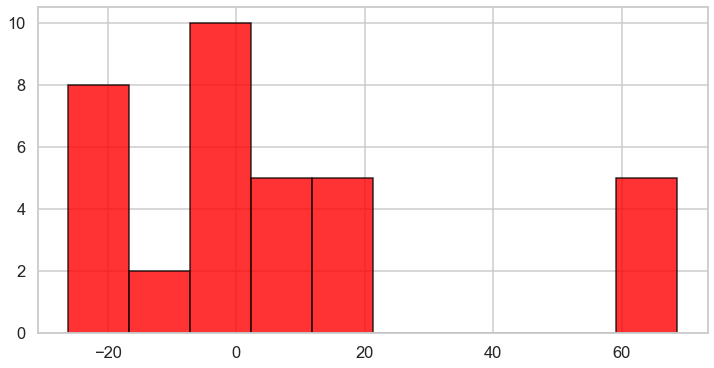

In [308]:
fig, ax = plt.subplots(figsize = (12,6))
ax.hist(flatten_preds - flatten_real_preds, alpha = 0.8, color = 'r', edgecolor = 'black')


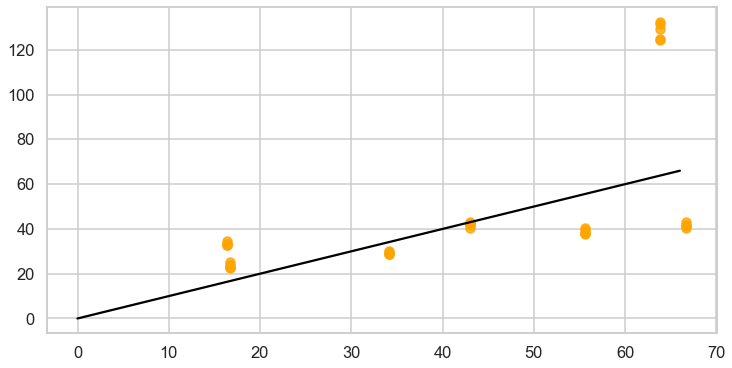

In [309]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(flatten_real_preds, flatten_preds, color = 'orange', alpha = 0.8)
ax.plot(np.arange(0,max(flatten_real_preds),1),np.arange(0,max(flatten_real_preds),1), color = 'black')

In [320]:

mapa_teste_1 = preds_veredito[0].flatten()
mapa_teste_2 = preds_veredito[1].flatten()
mapa_teste_3 = preds_veredito[2].flatten()
mapa_teste_4 = preds_veredito[3].flatten()
mapa_teste_5 = preds_veredito[4].flatten()

mapa_0 = []
mapa_0.extend(mapa_teste_1)
mapa_0.extend(mapa_teste_2)
mapa_0.extend(mapa_teste_3)
mapa_0.extend(mapa_teste_4)
mapa_0.extend(mapa_teste_5)

angles = np.arange(0,5,1)
print("Média: {:2f} e desvio de: {:2f}".format(np.mean(mapa_0), np.std(mapa_0)))

Média: 29.182102 e desvio de: 0.632564


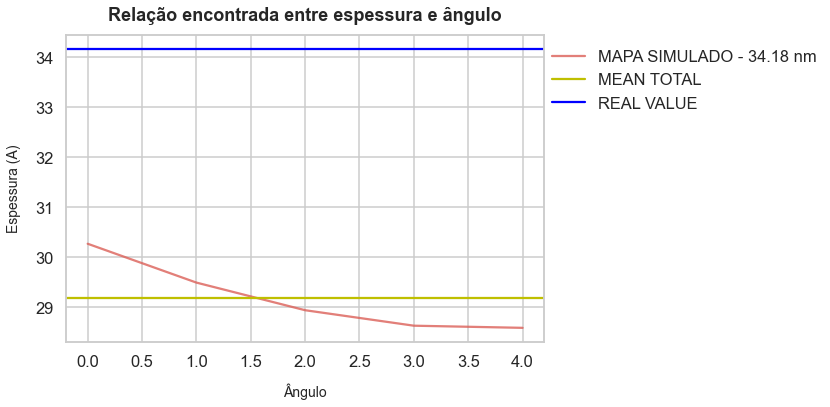

In [322]:
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(x=angles, y = mapa_0,ax = ax,alpha = 0.8, label = "MAPA SIMULADO - {:.2f} nm".format(y_veredito[0]));
#ax.axhline(y=mapa_teste_1.mean(), color='r', linestyle='-', label = 'MEAN MODEL 1')
#ax.axhline(y=mapa_teste_2.mean(), color='b', linestyle='-', label = 'MEAN MODEL 2')
#ax.axhline(y=mapa_teste_3.mean(), color='g', linestyle='-', label = 'MEAN MODEL 3')
#ax.axhline(y=mapa_teste_4.mean(), color='gray', linestyle='-', label = 'MEAN MODEL 4')
#ax.axhline(y=mapa_teste_5.mean(), color='y', linestyle='-', label = 'MEAN MODEL 5')
ax.axhline(y=np.mean(mapa_0), color='y', linestyle='-', label = 'MEAN TOTAL')
ax.axhline(y=y_veredito[0], color='b', linestyle='-', label = 'REAL VALUE')
ax.set_title("Relação encontrada entre espessura e ângulo", pad = 14, fontsize = 18,fontweight='bold')
ax.set_ylabel("Espessura (A)", labelpad = 14, fontsize = 14)
ax.set_xlabel("Ângulo", labelpad = 14, fontsize = 14)
fig.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0));


In [ ]:
from tensorflow.keras import initializers

In [21]:
def validate_on_df(model, df_valid,n):
    
    df_validacao, y_validacao = limit_map(5,df_valid,i=n)
    X_validation, y_validacao = data_to_keras_format(df_validacao,y_validacao)
    X_validation -= np.mean(X_validation)
    X_validation /= np.max(X_validation)
    test_predictions = model.predict(X_validation)
    
    return test_predictions,y_validacao

In [22]:
def generate_model(n_features):
    model = Sequential()
    model.add(Conv1D(9, kernel_size = 7,input_shape = (n_features,1)))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1))
    #optimizer = keras.optimizers.Adagrad()
    optimizer = keras.optimizers.Adam(lr = 1e-3, decay = 1e-3/200)
    #optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])

    return model

Levou 4.10 segundos para finalizar a adição de ruído.
Train on 23400 samples, validate on 156 samples
Epoch 1/100
23400/23400 [==============================] - 4s 173us/step - loss: 1868.9827 - mae: 37.0769 - mse: 1866.6602 - val_loss: 2045.6461 - val_mae: 38.2025 - val_mse: 2045.5481

Epoch 00001: val_mae improved from inf to 38.20249, saving model to data_barbara/highest_val_mae_weights_epoch01-val_mae38.202_cnn.h5
Epoch 2/100
23400/23400 [==============================] - 1s 62us/step - loss: 1475.0845 - mae: 33.4608 - mse: 1471.5820 - val_loss: 3689.8237 - val_mae: 55.7515 - val_mse: 3688.3882

Epoch 00002: val_mae did not improve from 38.20249
Epoch 3/100
23400/23400 [==============================] - 1s 62us/step - loss: 797.0881 - mae: 24.2880 - mse: 793.1180 - val_loss: 2556.3845 - val_mae: 44.6762 - val_mse: 2555.2312

Epoch 00003: val_mae did not improve from 38.20249
Epoch 4/100
23400/23400 [==============================] - 1s 62us/step - loss: 269.7013 - mae: 13.2133 - ms

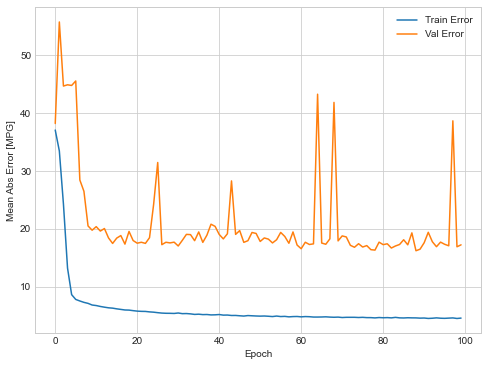

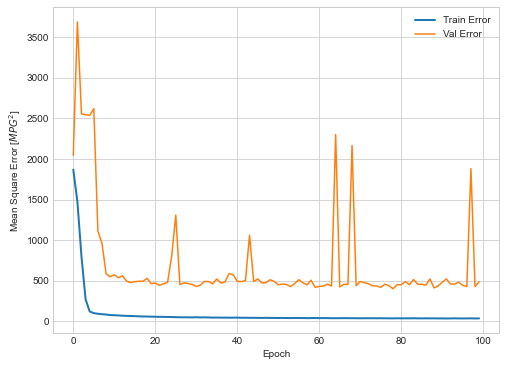

Levou 4.19 segundos para finalizar a adição de ruído.
Train on 23400 samples, validate on 156 samples
Epoch 1/100
23400/23400 [==============================] - 4s 156us/step - loss: 1830.4664 - mae: 36.8936 - mse: 1827.4865 - val_loss: 2428.6819 - val_mae: 42.9109 - val_mse: 2428.2305

Epoch 00001: val_mae improved from inf to 42.91085, saving model to data_barbara/highest_val_mae_weights_epoch01-val_mae42.911_cnn.h5
Epoch 2/100
23400/23400 [==============================] - 2s 70us/step - loss: 1370.4067 - mae: 32.4956 - mse: 1365.8152 - val_loss: 3599.3167 - val_mae: 54.8766 - val_mse: 3598.0950

Epoch 00002: val_mae did not improve from 42.91085
Epoch 3/100
23400/23400 [==============================] - 2s 72us/step - loss: 668.4439 - mae: 22.3010 - mse: 664.2221 - val_loss: 2630.3303 - val_mae: 45.1979 - val_mse: 2629.4236

Epoch 00003: val_mae did not improve from 42.91085
Epoch 4/100
23400/23400 [==============================] - 2s 68us/step - loss: 214.8474 - mae: 11.6807 - ms

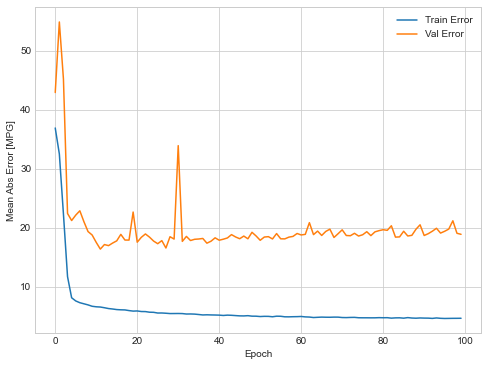

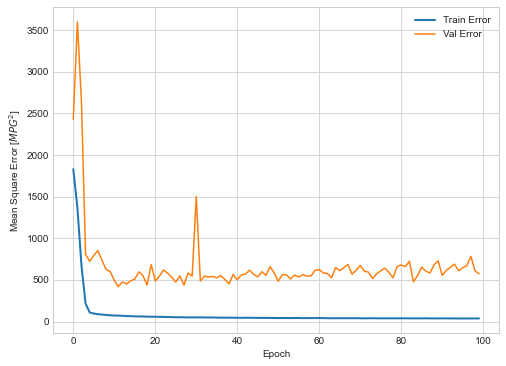

Levou 4.12 segundos para finalizar a adição de ruído.
Train on 23400 samples, validate on 156 samples
Epoch 1/100
23400/23400 [==============================] - 3s 142us/step - loss: 1878.0106 - mae: 37.1208 - mse: 1875.2552 - val_loss: 2340.6602 - val_mae: 41.8729 - val_mse: 2340.1543

Epoch 00001: val_mae improved from inf to 41.87290, saving model to data_barbara/highest_val_mae_weights_epoch01-val_mae41.873_cnn.h5
Epoch 2/100
23400/23400 [==============================] - 2s 68us/step - loss: 1531.7963 - mae: 33.9399 - mse: 1527.8799 - val_loss: 4096.5918 - val_mae: 59.2225 - val_mse: 4094.5781

Epoch 00002: val_mae did not improve from 41.87290
Epoch 3/100
23400/23400 [==============================] - 2s 69us/step - loss: 878.7594 - mae: 25.4452 - mse: 874.7204 - val_loss: 5226.8384 - val_mae: 68.1211 - val_mse: 5224.6929

Epoch 00003: val_mae did not improve from 41.87290
Epoch 4/100
23400/23400 [==============================] - 2s 71us/step - loss: 309.0750 - mae: 14.1440 - ms

In [ ]:
models = []
histories = []
epochs = 100
batch_size = 300
for i in range(5):
    n = 0
    df_n, labels_n = limit_map(n_slice=5, df = df, i=n)
    X_train, X_test, y_train, y_test = train_test_split(df_n, labels_n, test_size=0.4, random_state=12)
    X_train,y_train = get_noise_train(X_train, y_train, size = 100,nComp=10)
    X_test = np.array(X_test)
    X_train, y_train = data_to_keras_format(X_train,y_train)
    X_test, y_test = data_to_keras_format(X_test, y_test)
    n_timesteps, n_features, n_outputs = X_train.shape[0], X_train.shape[1], y_train.shape[0]
    #model = generate_model(n_features = n_features)
    model = conv_model()
    hist = train_model(model,X_train,X_test,y_train,y_test,epochs=epochs,batch_size=batch_size)
    histories.append(hist)
    models.append(model)
    plot_history(hist)
    n+=1
    

In [39]:
predictions = []
real_predictions = []
n = 0
for model in models:
    pred,y_real = validate_on_df(model,df_valid,n)
    
    predictions.append(pred)
    real_predictions.append(y_real)
    n+=5

In [40]:
flatten_preds = np.array(predictions).flatten()
flatten_real_preds = np.array(real_predictions).flatten()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

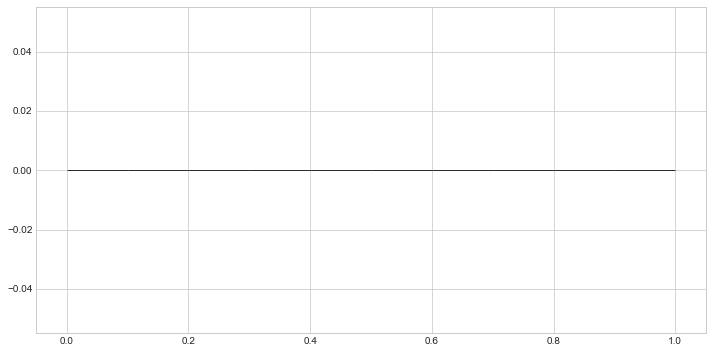

In [41]:
fig, ax = plt.subplots(figsize = (12,6))
ax.hist(flatten_preds - flatten_real_preds, alpha = 0.8, color = 'r', edgecolor = 'black')


In [42]:
predictions[0].flatten()

IndexError: list index out of range

In [43]:
real_predictions[0]


IndexError: list index out of range

In [28]:
select = (4,5)
mapa_teste_1 = predictions[0][select[0]:select[1]].flatten()
mapa_teste_2 = predictions[1][select[0]:select[1]].flatten()
mapa_teste_3 = predictions[2][select[0]:select[1]].flatten()
mapa_teste_4 = predictions[3][select[0]:select[1]].flatten()
mapa_teste_5 = predictions[4][select[0]:select[1]].flatten()

mapa_0 = []
mapa_0.extend(mapa_teste_1)
mapa_0.extend(mapa_teste_2)
mapa_0.extend(mapa_teste_3)
mapa_0.extend(mapa_teste_4)
mapa_0.extend(mapa_teste_5)

angles = np.arange(0,5,1)
print("Média: {:2f} e desvio de: {:2f}".format(np.mean(mapa_0), np.std(mapa_0)))

Média: 7.415445 e desvio de: 9.168903


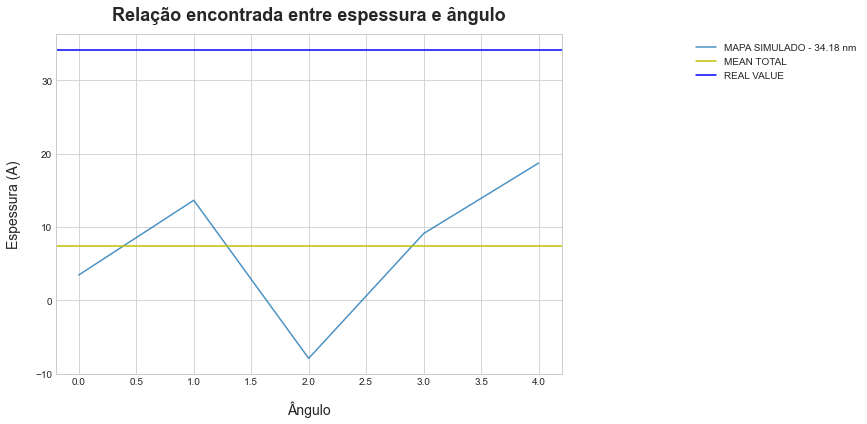

In [29]:
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(x=angles, y = mapa_0,ax = ax,alpha = 0.8, label = "MAPA SIMULADO - {:.2f} nm".format(real_predictions[0][select[0]]));
#ax.axhline(y=mapa_teste_1.mean(), color='r', linestyle='-', label = 'MEAN MODEL 1')
#ax.axhline(y=mapa_teste_2.mean(), color='b', linestyle='-', label = 'MEAN MODEL 2')
#ax.axhline(y=mapa_teste_3.mean(), color='g', linestyle='-', label = 'MEAN MODEL 3')
#ax.axhline(y=mapa_teste_4.mean(), color='gray', linestyle='-', label = 'MEAN MODEL 4')
#ax.axhline(y=mapa_teste_5.mean(), color='y', linestyle='-', label = 'MEAN MODEL 5')
ax.axhline(y=np.mean(mapa_0), color='y', linestyle='-', label = 'MEAN TOTAL')
ax.axhline(y=real_predictions[0][select[0]], color='b', linestyle='-', label = 'REAL VALUE')
ax.set_title("Relação encontrada entre espessura e ângulo", pad = 14, fontsize = 18,fontweight='bold')
ax.set_ylabel("Espessura (A)", labelpad = 14, fontsize = 14)
ax.set_xlabel("Ângulo", labelpad = 14, fontsize = 14)
fig.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0));


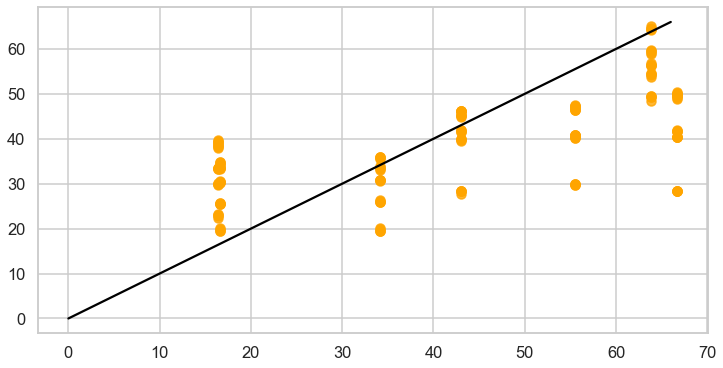

In [118]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(flatten_real_preds, flatten_preds, color = 'orange', alpha = 0.8)
ax.plot(np.arange(0,max(flatten_real_preds),1),np.arange(0,max(flatten_real_preds),1), color = 'black')

# Testes realizados com simulações não utilizadas no treinamento

In [119]:
def predict(path):
    model_1 = models[0]
    model_2 = models[1]
    model_3 = models[2]
    model_4 = models[3]
    model_5 = models[4]
    data_teste_0 = get_data_from_map(path)
    df_temp = pd.DataFrame(data_teste_0)
    n_array = 689
    df = pd.DataFrame(columns = np.arange(0,n_array))
    values = []
    lag  = 12
    j = 0
    for i in range(int(df_temp.shape[0]/lag)):
        values.append(df_temp.iloc[j:j+lag].sum().tolist())
        j+=1
        
    df = df.append(values, ignore_index = True)
    #df = df.append(df_temp, ignore_index = True)
    print(df.shape, type(df))
    
    df_1,_ = limit_map(5,df,i=0)
    df_2,_ = limit_map(5,df,i=5)
    df_3,_ = limit_map(5,df,i=10)
    df_4,_ = limit_map(5,df,i=15)
    df_5,_ = limit_map(5,df,i=20)
    
    X_real_1, a = data_to_keras_format(df_1, np.zeros(10))
    prediction_1 = model_1.predict(X_real_1)
    
    X_real_2,b = data_to_keras_format(df_2, np.zeros(10))
    prediction_2 = model_2.predict(X_real_2)
    
    X_real_3,c = data_to_keras_format(df_3, np.zeros(10))
    prediction_3 = model_3.predict(X_real_3)
    
    X_real_4,d = data_to_keras_format(df_4, np.zeros(10))
    prediction_4 = model_4.predict(X_real_4)
    
    X_real_5,e = data_to_keras_format(df_5, np.zeros(10))
    prediction_5 = model_5.predict(X_real_5)
    
    
    
    result = [prediction_1,prediction_2,prediction_3,prediction_4,prediction_5]
    return result
#predict(file_name)    

# Rodar somente quando necessário
files_barbara = ['EXPscan1_dL_0.75_thickness_52_frac_m1_0.6_frac_m2_0.4.dat',
 'EXPscan2_dL_0.76_thickness_48_frac_m1_0.59_frac_m2_0.41.dat',
 'EXPscan3_dL_0.765_thickness_40_frac_m1_0.56_frac_m2_0.44.dat',
 'EXPscan4_dL_0.76_thickness_41_frac_m1_0.57_frac_m2_0.43.dat']
path_0 = r'C:\\Users\\lucas\\Documents\\Mestrado\\LII-UFRGS\\data_barbara\\Mapas_experimentais_(MEIS)\\'

import dmeis
for file in files_barbara:
    file_name = path_0 + file
    
    exp = dmeis.read_file(file_name)
    exp_final = dmeis.rebine(exp,exp_new_denergy = 0.1)
    energies_real = exp_final.energy[:-1]
    counts_real = exp_final.counts[:-1]
    dmeis.print_spectrum(file_name,exp_final)

In [120]:
path_bab = r'data_barbara\Mapas_experimentais_(MEIS)//'
files_barbara  = [f for f in listdir(path_bab) if isfile(join(path_bab,f))]
print(files_barbara)

['EXPscan1_dL_0.75_thickness_52_frac_m1_0.6_frac_m2_0.4.dat', 'EXPscan2_dL_0.76_thickness_48_frac_m1_0.59_frac_m2_0.41.dat', 'EXPscan3_dL_0.765_thickness_40_frac_m1_0.56_frac_m2_0.44.dat', 'EXPscan4_dL_0.76_thickness_41_frac_m1_0.57_frac_m2_0.43.dat']


In [121]:
k = 1
values_1 = []
values_2 = []
values_3 = []
values_4 = []
values_5 = []
models_result = {}
for file in files_barbara:
    file_name = path_bab + file
    file_result = predict(file_name)
    values_1.append(file_result[0].flatten())
    values_2.append(file_result[1].flatten())
    values_3.append(file_result[2].flatten())
    values_4.append(file_result[3].flatten())
    values_5.append(file_result[4].flatten())
    k+=1

(25, 689) <class 'pandas.core.frame.DataFrame'>
(25, 689) <class 'pandas.core.frame.DataFrame'>
(25, 689) <class 'pandas.core.frame.DataFrame'>
(25, 689) <class 'pandas.core.frame.DataFrame'>


In [122]:


angles = np.arange(0, 25,1)
def get_thickness_relation(values_1,values_2,values_3,values_4,values_5,n):
    result = []
    
    result.extend(values_1[n])
    result.extend(values_2[n])
    result.extend(values_3[n])
    result.extend(values_4[n])
    result.extend(values_5[n])
    return np.array(result)

In [123]:
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette('hls')

In [124]:
t1 = get_thickness_relation(values_1,values_2,values_3,values_4,values_5,0)
t2 = get_thickness_relation(values_1,values_2,values_3,values_4,values_5,1)
t3 = get_thickness_relation(values_1,values_2,values_3,values_4,values_5,2)
t4 = get_thickness_relation(values_1,values_2,values_3,values_4,values_5,3)

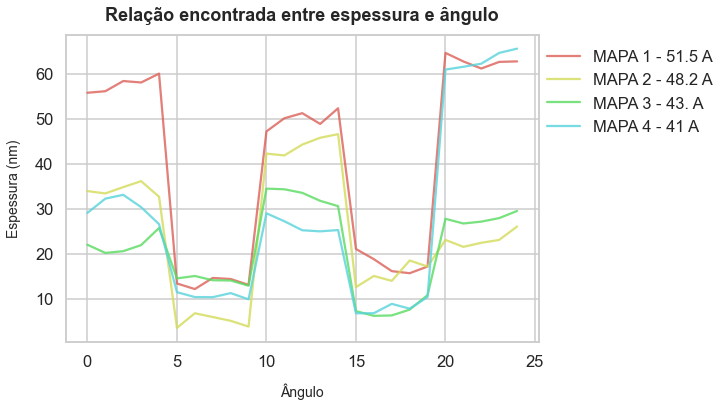

In [125]:
# plot com reta horizontal de t
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(x=angles, y = t1,ax = ax,alpha = 0.8, label = "MAPA 1 - 51.5 A");
sns.lineplot(x=angles, y = t2,ax = ax,alpha = 0.8, label = "MAPA 2 - 48.2 A");
sns.lineplot(x=angles, y = t3,ax = ax,alpha = 0.8, label = "MAPA 3 - 43. A");
sns.lineplot(x=angles, y = t4,ax = ax,alpha = 0.8, label = "MAPA 4 - 41 A");
ax.set_title("Relação encontrada entre espessura e ângulo", pad = 14, fontsize = 18,fontweight='bold')
ax.set_ylabel("Espessura (nm)", labelpad = 14, fontsize = 14)
ax.set_xlabel("Ângulo", labelpad = 14, fontsize = 14)
fig.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0));


In [126]:
real = [52,48,40]

In [127]:
#ESPECTRO 1
nota_1 = np.mean(values_1[0].flatten())
std_1 = np.std(values_1[0].flatten())

nota_2 = np.mean(values_2[0].flatten())
std_2 = np.std(values_2[0].flatten())

nota_3 = np.mean(values_3[0].flatten())
std_3 = np.std(values_3[0].flatten())

nota_4 = np.mean(values_4[0].flatten())
std_4 = np.std(values_4[0].flatten())

nota_5 = np.mean(values_5[0].flatten())
std_5 = np.std(values_5[0].flatten())

nota_final_1 = (nota_1 + nota_2 + nota_3 + nota_4 + nota_5)/5
desvio_final_1 = (std_1 + std_2 + std_3 + std_4 + std_5)/5
print(f"ESPESSURA PREDITA MAPA 1: {nota_final_1} com desvio de: {desvio_final_1}")

ESPESSURA PREDITA MAPA 1: 40.33039855957031 com desvio de: 1.4652012825012206


In [128]:
#ESPECTRO 2
nota_1 = np.mean(values_1[1].flatten())
std_1 = np.std(values_1[1].flatten())

nota_2 = np.mean(values_2[1].flatten())
std_2 = np.std(values_2[1].flatten())

nota_3 = np.mean(values_3[1].flatten())
std_3 = np.std(values_3[1].flatten())

nota_4 = np.mean(values_4[1].flatten())
std_4 = np.std(values_4[1].flatten())

nota_5 = np.mean(values_5[1].flatten())
std_5 = np.std(values_5[1].flatten())

nota_final_2 = (nota_1 + nota_2 + nota_3 + nota_4 + nota_5)/5
desvio_final_2 = (std_1 + std_2 + std_3 + std_4 + std_5)/5
print(f"ESPESSURA PREDITA MAPA 2: {nota_final_2} com desvio de: {desvio_final_2}")

ESPESSURA PREDITA MAPA 2: 24.401797485351562 com desvio de: 1.5892845153808595


In [129]:
#ESPECTRO 3
nota_1 = np.mean(values_1[2].flatten())
std_1 = np.std(values_1[2].flatten())

nota_2 = np.mean(values_2[2].flatten())
std_2 = np.std(values_2[2].flatten())

nota_3 = np.mean(values_3[2].flatten())
std_3 = np.std(values_3[2].flatten())

nota_4 = np.mean(values_4[2].flatten())
std_4 = np.std(values_4[2].flatten())

nota_5 = np.mean(values_5[2].flatten())
std_5 = np.std(values_5[2].flatten())

nota_final_3 = (nota_1 + nota_2 + nota_3 + nota_4 + nota_5)/5
desvio_final_3 = (std_1 + std_2 + std_3 + std_4 + std_5)/5
print(f"ESPESSURA PREDITA MAPA 1: {nota_final_3} com desvio de: {desvio_final_3}")

ESPESSURA PREDITA MAPA 1: 20.908895874023436 com desvio de: 1.3652606010437012


In [130]:
#ESPECTRO 4
nota_1 = np.mean(values_1[3].flatten())
std_1 = np.std(values_1[3].flatten())

nota_2 = np.mean(values_2[3].flatten())
std_2 = np.std(values_2[3].flatten())

nota_3 = np.mean(values_3[3].flatten())
std_3 = np.std(values_3[3].flatten())

nota_4 = np.mean(values_4[3].flatten())
std_4 = np.std(values_4[3].flatten())

nota_5 = np.mean(values_5[3].flatten())
std_5 = np.std(values_5[3].flatten())

nota_final_4 = (nota_1 + nota_2 + nota_3 + nota_4 + nota_5)/5
desvio_final_4 = (std_1 + std_2 + std_3 + std_4 + std_5)/5
print(f"ESPESSURA PREDITA MAPA 4: {nota_final_4} com desvio de: {desvio_final_4}")

ESPESSURA PREDITA MAPA 4: 27.66605224609375 com desvio de: 1.5305663108825684
